
**"FraudGuard: Enhancing Credit Card Fraud Detection with Machine Learning"**

I'm excited to share a recent project where I dove into the world of credit card fraud detection using machine learning! 💻🔍

Here's a quick overview of what I worked on:

1. **Data Exploration:** I started by examining a credit card transactions dataset, analyzing class distributions, and understanding correlations between features. 🧐📊

2. **Balancing the Dataset:** To address the class imbalance, I sampled legitimate transactions to create a balanced dataset with both legitimate and fraudulent transactions. ⚖️

3. **Model Building:** I implemented three different machine learning models:
   - **Logistic Regression** 🚀
   - **Random Forest Classifier** 🌳
   - **Support Vector Machine (SVM)** 🌐

   Each model was trained and evaluated on accuracy, recall, and F1 score. 

4. **Performance Evaluation:** I compared the models using confusion matrices, classification reports, ROC curves, and AUC scores. 📈

5. **Visualization:** To make the data insights clearer, I created visualizations including:
   - Correlation heatmaps 🔍
   - Distribution of transaction amounts 💵
   - Time series analysis of transactions 📅
   - A comparison of model performance 📊

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report

In [2]:
# Load the dataset
cd = pd.read_csv(r"C:\Users\HP\Downloads\Credit_card\creditcard.csv")

In [3]:
# Check the first few rows of the dataset
cd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Dataset info
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check for missing values
print(cd.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Check the distribution of the classes
print(cd['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
# Separate the data into legitimate and fraud transactions
legit = cd[cd.Class == 0]
fraud = cd[cd.Class == 1]

In [9]:
# Sample the legitimate transactions to balance the dataset
legit_sample = legit.sample(n=492)
new_ds = pd.concat([legit_sample, fraud], axis=0)

In [10]:
# Split the data into features and target
X = new_ds.drop(columns='Class', axis=1)
Y = new_ds['Class']

In [26]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
16008    27444.0  1.256823  0.314923  0.294906  0.698643 -0.422046 -1.087065   
2538      2099.0 -0.643533  0.856521  1.108578 -2.064887  0.157108 -1.234863   
215870  140253.0 -0.295022  0.794851  0.816378  3.236927  1.106730 -0.634799   
123446   76930.0  1.234543 -0.564856  0.228128 -1.779598 -0.974311 -1.039770   
144190   85926.0 -1.161006  1.108699  1.569666  0.076594  0.138402 -0.453802   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [27]:
print(Y)

16008     0
2538      0
215870    0
123446    0
144190    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [11]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [12]:
# Initialize the models
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=2)
svm_model = SVC(probability=True, random_state=2)

In [29]:
# Train the models
logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [31]:
svm_model.fit(X_train, Y_train)

SVC(probability=True, random_state=2)

In [14]:
# Predictions for each model
logistic_pred = logistic_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

In [15]:
# Accuracy for each model
logistic_accuracy = accuracy_score(Y_test, logistic_pred)
rf_accuracy = accuracy_score(Y_test, rf_pred)
svm_accuracy = accuracy_score(Y_test, svm_pred)

In [16]:
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

Logistic Regression Accuracy: 0.9187817258883249
Random Forest Accuracy: 0.934010152284264
SVM Accuracy: 0.5329949238578681


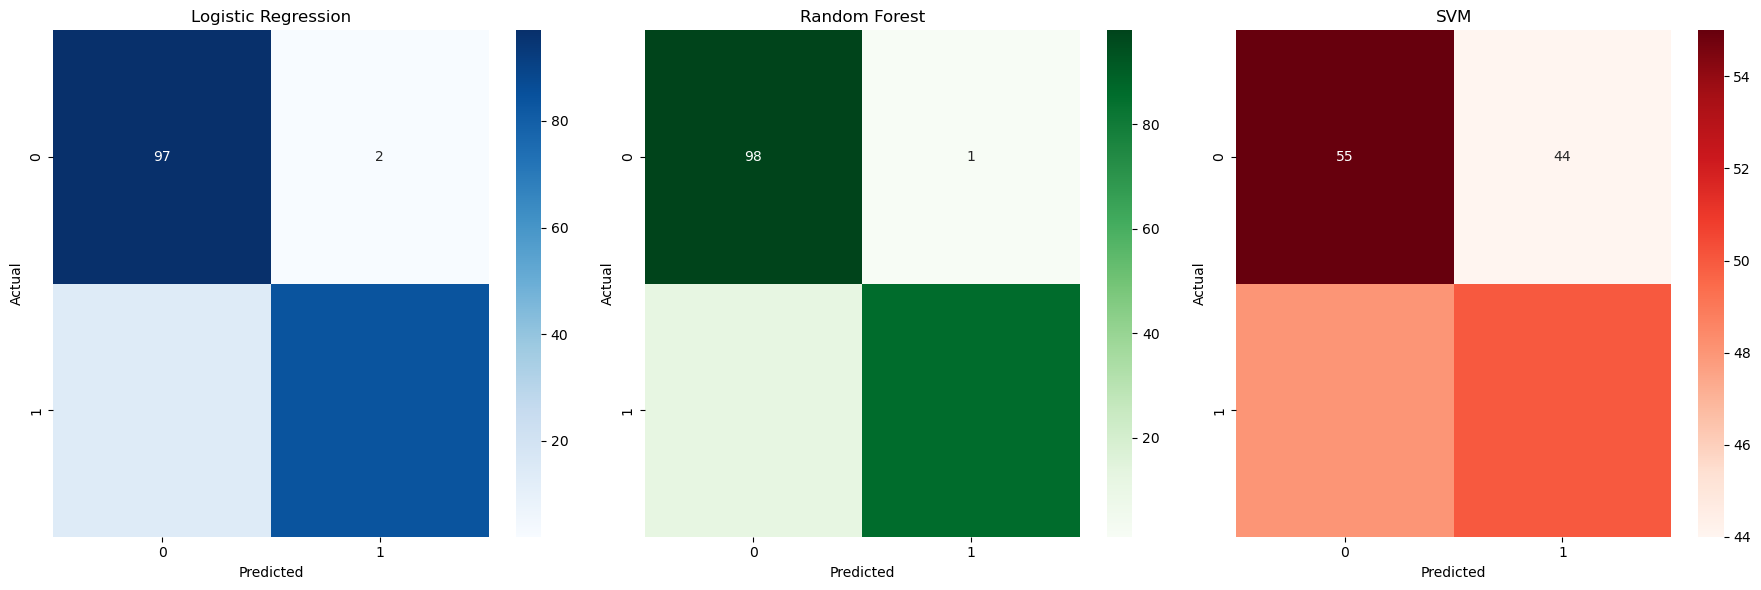

In [17]:
# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Define color maps
color_maps = ['Blues', 'Greens', 'Reds']

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, logistic_pred), annot=True, fmt='d', ax=ax[0], cmap=color_maps[0])
ax[0].set_title('Logistic Regression')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, rf_pred), annot=True, fmt='d', ax=ax[1], cmap=color_maps[1])
ax[1].set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

# SVM Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, svm_pred), annot=True, fmt='d', ax=ax[2], cmap=color_maps[2])
ax[2].set_title('SVM')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [18]:
# Classification Reports
print("Logistic Regression:")
print(classification_report(Y_test, logistic_pred))

print("Random Forest:")
print(classification_report(Y_test, rf_pred))

print("SVM:")
print(classification_report(Y_test, svm_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        99
           1       0.98      0.86      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

SVM:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        99
           1       0.53      0.51      0.52        98

    accuracy                           0.53       197
   macro avg       0.53      0.53      0.53       197
weighted avg       0.53      0.53

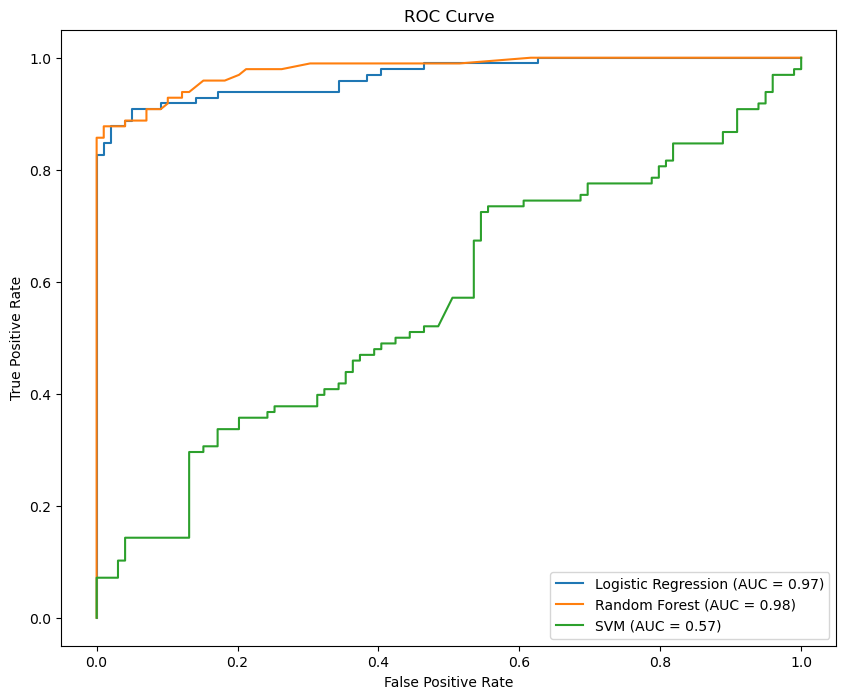

In [19]:
# ROC Curve and AUC
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.predict_proba(X_test)[:, 1]

logistic_fpr, logistic_tpr, _ = roc_curve(Y_test, logistic_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm_probs)

logistic_auc = auc(logistic_fpr, logistic_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(10, 8))
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, linestyle='-', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, linestyle='-', label=f'SVM (AUC = {svm_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

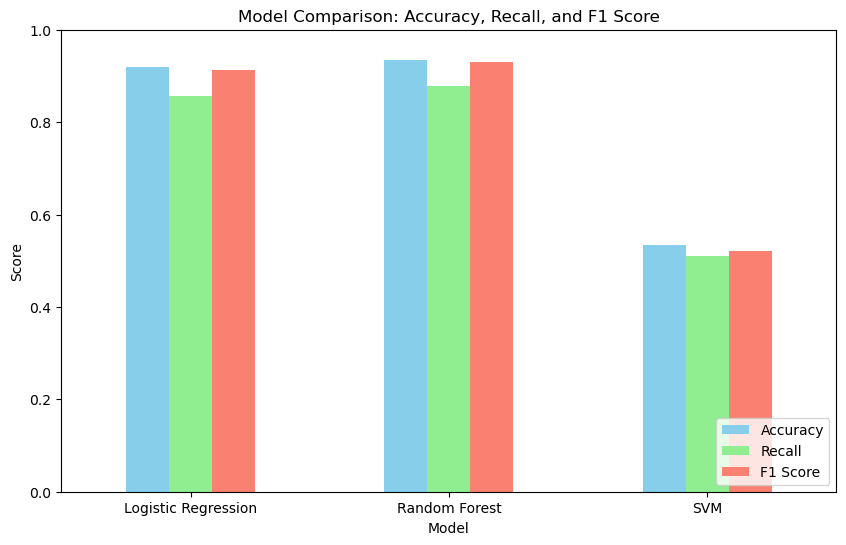

In [20]:
# Comparison Graph: Accuracy, Recall, and F1 Score
logistic_recall = recall_score(Y_test, logistic_pred)
rf_recall = recall_score(Y_test, rf_pred)
svm_recall = recall_score(Y_test, svm_pred)

recall = [logistic_recall, rf_recall, svm_recall]

logistic_f1 = f1_score(Y_test, logistic_pred)
rf_f1 = f1_score(Y_test, rf_pred)
svm_f1 = f1_score(Y_test, svm_pred)

f1 = [logistic_f1, rf_f1, svm_f1]

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [logistic_accuracy, rf_accuracy, svm_accuracy],
    'Recall': recall,
    'F1 Score': f1
})

# Plot the comparison graph
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Model Comparison: Accuracy, Recall, and F1 Score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

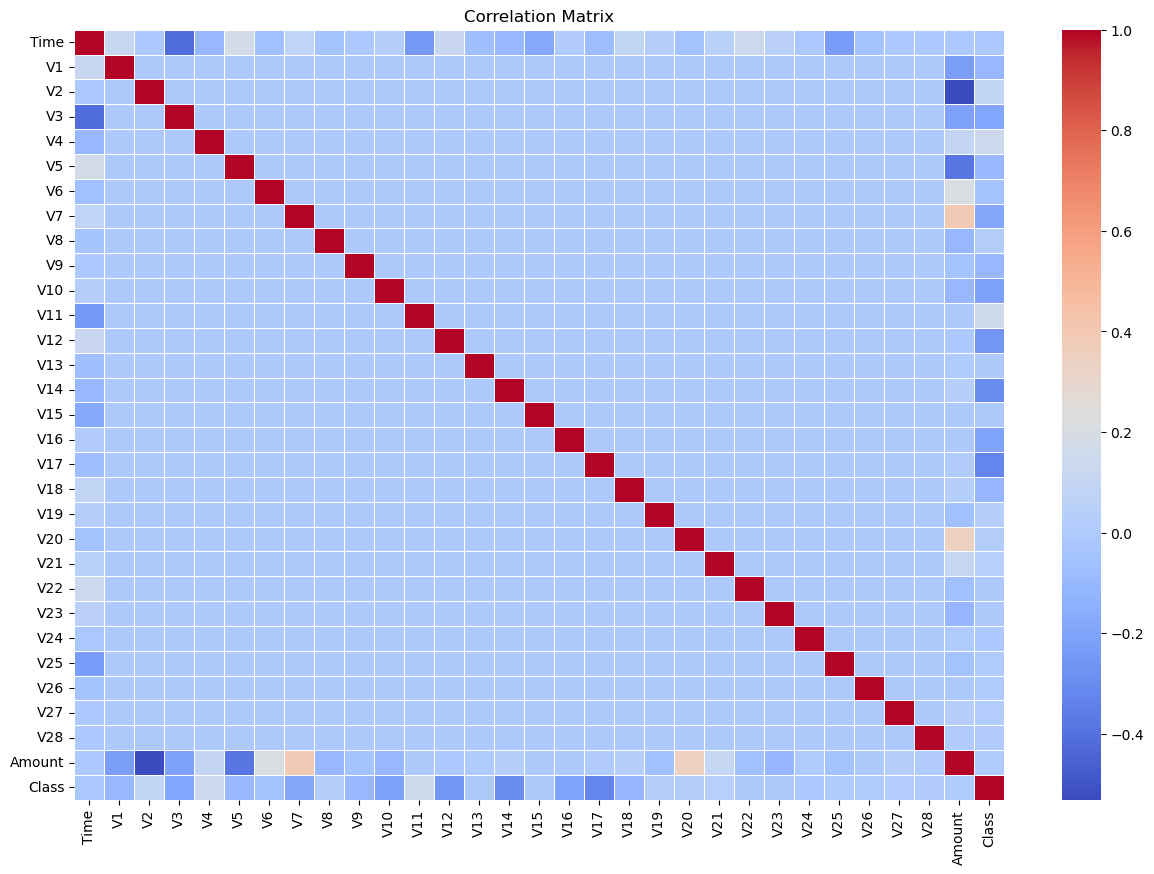

In [21]:
# Correlation matrix
plt.figure(figsize=(15, 10))
corr_matrix = cd.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


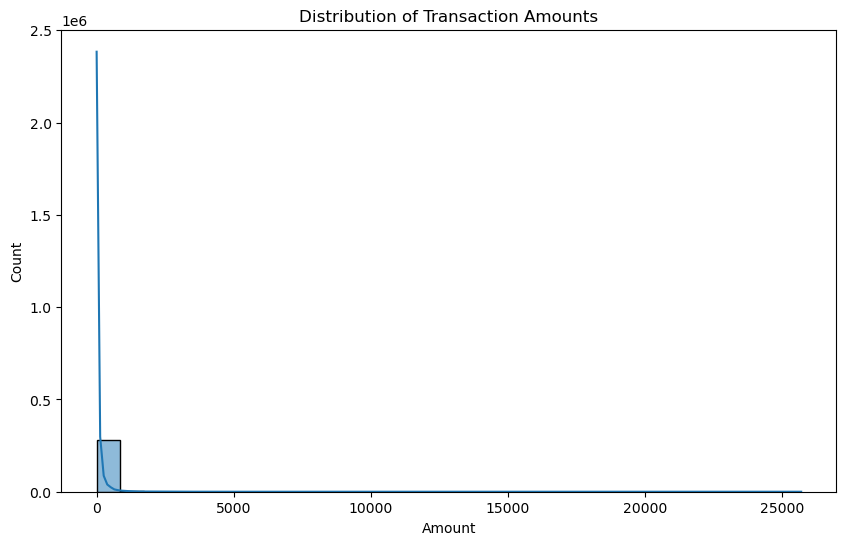

In [22]:
# Distribution of the Amount feature
plt.figure(figsize=(10, 6))
sns.histplot(cd['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

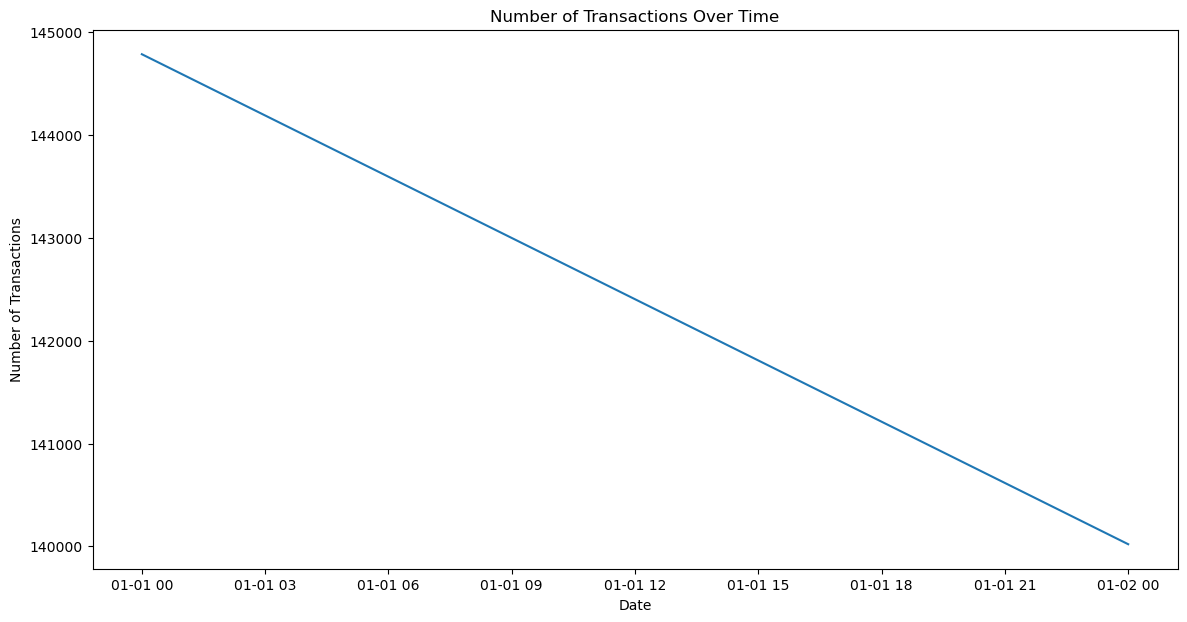

In [23]:
#  Time Series of Transactions (if 'Time' feature exists)
if 'Time' in cd.columns:
    plt.figure(figsize=(14, 7))
    cd['Time'] = pd.to_datetime(cd['Time'], unit='s')  # Convert time if necessary
    cd.groupby(cd['Time'].dt.date).size().plot()
    plt.title('Number of Transactions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.show()
else:
    print("No 'Time' column in dataset for time series analysis.")

C:\Users\HP\AppData\Local\Temp\ipykernel_6312\1496480896.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Amount', y='Class', data=cd, alpha=0.5, palette='coolwarm')


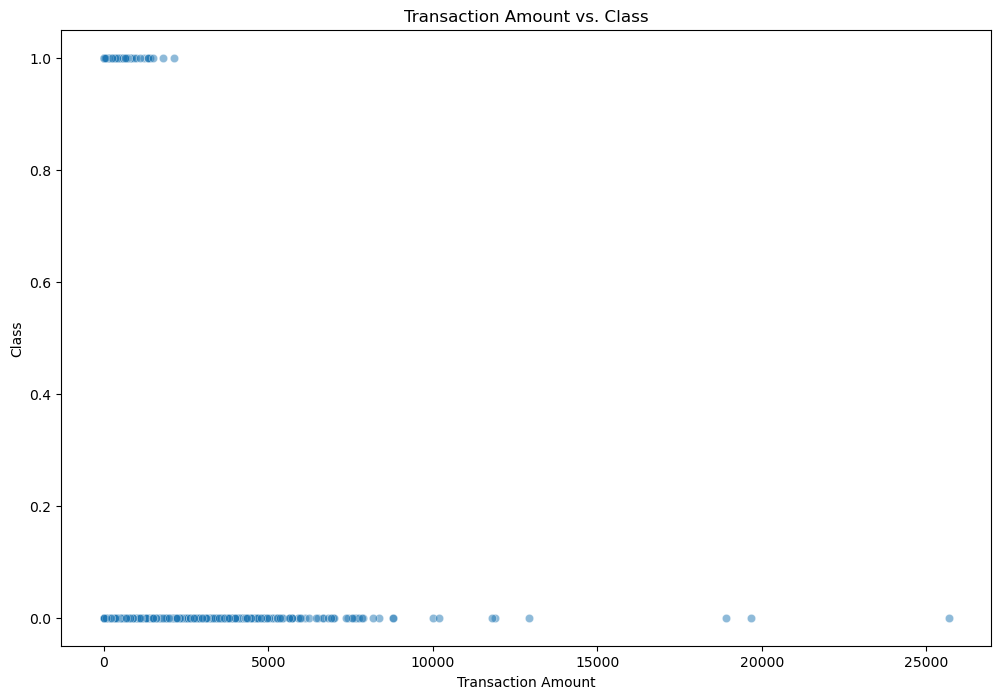

In [24]:
# Transaction Amount vs. Class
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Amount', y='Class', data=cd, alpha=0.5, palette='coolwarm')
plt.title('Transaction Amount vs. Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Class')
plt.show()

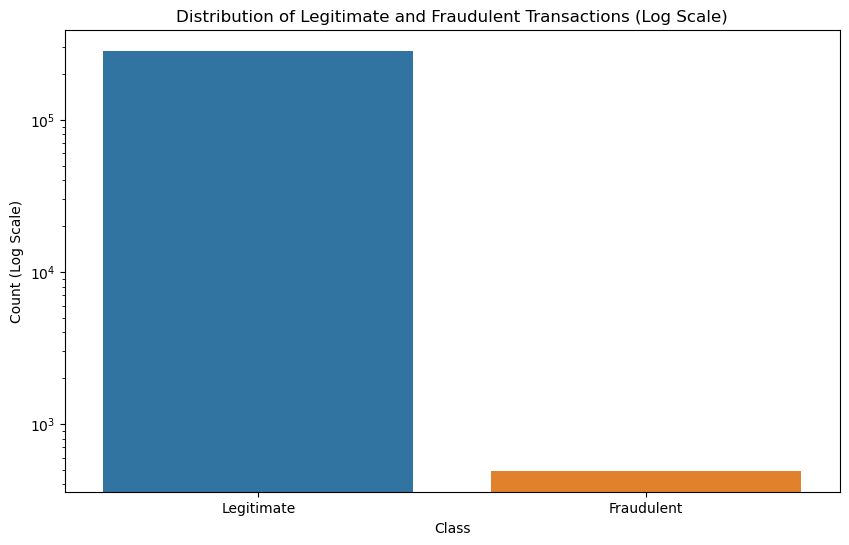

In [25]:
# Distribution of legitimate and fraudulent transactions (using the full dataset with log scale)
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=cd)
plt.title('Distribution of Legitimate and Fraudulent Transactions (Log Scale)')
plt.xlabel('Class')
plt.ylabel('Count (Log Scale)')
plt.yscale('log')
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraudulent'])
plt.show()
